# Cancer diagnoses after 50 years old


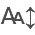

In [1]:
import numpy as np
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
import itables.options as opt

opt.classes="display nowrap compact"
opt.buttons=["copyHtml5", "csvHtml5", "excelHtml5"]
opt.maxBytes=0


In [2]:
from cdapython import tables, columns, column_values, fetch_rows, summary_counts

I'm a cancer researcher, and I'm interested in profiling cancer occurance as a function of age. I don't have a specific plan yet, but I'd like to see what data is out there for diagnosis ages for various cancers.

First, decide what column to search. I'm looking for columns that have to do with age:

In [3]:
columns(description="age")

table             column data_type  nullable  \
0  diagnosis   age_at_diagnosis   integer      True   
1    subject          ethnicity      text      True   
2    subject               race      text      True   
3  treatment  therapeutic_agent      text      True   

                                         description  
0  The age in days of the individual at the time ...  
1  An individuals self-described social and cultu...  
2  An arbitrary classification of a taxonomic gro...  
3  One or more therapeutic agents as part of this...

age_at_diagnosis is exactly what I need, and the description tells me that ages are in days, so I'm going to start by looking for data for subjects who are over 50, first I'll calculate how many days that is:

In [4]:
50*365

18250

then run my search:

In [5]:
fetch_rows(table="subject", match_all=["age_at_diagnosis > 18250"])

subject_id cause_of_death  days_to_birth  \
0      Academia Sinica LUAD-100.P002           <NA>           <NA>   
1      Academia Sinica LUAD-100.P003           <NA>           <NA>   
2      Academia Sinica LUAD-100.P004           <NA>           <NA>   
3      Academia Sinica LUAD-100.P005           <NA>           <NA>   
4      Academia Sinica LUAD-100.P007           <NA>           <NA>   
...                              ...            ...            ...   
26801                   WCDT.DTB-258           <NA>           <NA>   
26802                   WCDT.DTB-260           <NA>           <NA>   
26803                   WCDT.DTB-261           <NA>           <NA>   
26804                   WCDT.DTB-265           <NA>           <NA>   
26805                   WCDT.DTB-266           <NA>           <NA>   

       days_to_death               ethnicity   race          sex  \
0               <NA>                    <NA>   <NA>         male   
1               <NA>                    <NA>   <NA>  unspecified   
2               <NA>                    <NA>   <NA>       female   
3               <NA>                    <NA>   <NA>         male   
4               <NA>                    <NA>   <NA>         male   
...              ...                     ...    ...          ...   
26801           <NA>  Not Hispanic or Latino  White         male   
26802           <NA>  Not Hispanic or Latino  White         male   
26803           <NA>  Not Hispanic or Latino  White         male   
26804           <NA>  Not Hispanic or Latino  Asian         male   
26805           <NA>  Not Hispanic or Latino  White         male   

            species vital_status  
0      Homo sapiens         <NA>  
1      Homo sapiens         <NA>  
2      Homo sapiens         <NA>  
3      Homo sapiens         <NA>  
4      Homo sapiens         <NA>  
...             ...          ...  
26801  Homo sapiens         <NA>  
26802  Homo sapiens         <NA>  
26803  Homo sapiens         <NA>  
26804  Homo sapiens         <NA>  
26805  Homo sapiens         <NA>  

[26806 rows x 9 columns]

There's quite a lot of data, I'm going to try some age brackets, and link to the researchsubject table so I can see their diagnoses:

In [8]:
fetch_rows(table="subject", match_all=["age_at_diagnosis > 18250", "age_at_diagnosis < 21900"], link_to_table = "researchsubject")

subject_id cause_of_death  days_to_birth  \
0      Academia Sinica LUAD-100.P003           <NA>           <NA>   
1      Academia Sinica LUAD-100.P004           <NA>           <NA>   
2      Academia Sinica LUAD-100.P009           <NA>           <NA>   
3      Academia Sinica LUAD-100.P010           <NA>           <NA>   
4      Academia Sinica LUAD-100.P011           <NA>           <NA>   
...                              ...            ...            ...   
14288                   WCDT.DTB-080           <NA>           <NA>   
14289                   WCDT.DTB-098           <NA>           <NA>   
14290                   WCDT.DTB-135           <NA>           <NA>   
14291                   WCDT.DTB-183           <NA>           <NA>   
14292                   WCDT.DTB-186           <NA>           <NA>   

       days_to_death               ethnicity   race          sex  \
0               <NA>                    <NA>   <NA>  unspecified   
1               <NA>                    <NA>   <NA>       female   
2               <NA>                    <NA>   <NA>  unspecified   
3               <NA>                    <NA>   <NA>       female   
4               <NA>                    <NA>   <NA>       female   
...              ...                     ...    ...          ...   
14288           <NA>  Not Hispanic or Latino  White         male   
14289           <NA>  Not Hispanic or Latino  White         male   
14290           <NA>  Not Hispanic or Latino  White         male   
14291           <NA>  Not Hispanic or Latino  White         male   
14292           <NA>  Not Hispanic or Latino  White         male   

            species vital_status  researchsubject_id  \
0      Homo sapiens         <NA>      PDC000219.P003   
1      Homo sapiens         <NA>      PDC000219.P004   
2      Homo sapiens         <NA>      PDC000219.P009   
3      Homo sapiens         <NA>      PDC000219.P010   
4      Homo sapiens         <NA>      PDC000219.P011   
...             ...          ...                 ...   
14288  Homo sapiens         <NA>  WCDT-MCRPC.DTB-080   
14289  Homo sapiens         <NA>  WCDT-MCRPC.DTB-098   
14290  Homo sapiens         <NA>  WCDT-MCRPC.DTB-135   
14291  Homo sapiens         <NA>  WCDT-MCRPC.DTB-183   
14292  Homo sapiens         <NA>  WCDT-MCRPC.DTB-186   

      member_of_research_project   primary_diagnosis_condition  \
0                      PDC000219                          <NA>   
1                      PDC000219  Lung Squamous Cell Carcinoma   
2                      PDC000219           Lung Adenocarcinoma   
3                      PDC000219           Lung Adenocarcinoma   
4                      PDC000219           Lung Adenocarcinoma   
...                          ...                           ...   
14288                 WCDT-MCRPC  Adenomas and Adenocarcinomas   
14289                 WCDT-MCRPC  Adenomas and Adenocarcinomas   
14290                 WCDT-MCRPC  Adenomas and Adenocarcinomas   
14291                 WCDT-MCRPC  Adenomas and Adenocarcinomas   
14292                 WCDT-MCRPC  Adenomas and Adenocarcinomas   

      primary_diagnosis_site  
0                       Lung  
1                       Lung  
2                       Lung  
3                       Lung  
4                       Lung  
...                      ...  
14288         Prostate gland  
14289         Prostate gland  
14290         Prostate gland  
14291         Prostate gland  
14292         Prostate gland  

[14293 rows x 13 columns]